In [5]:
import h5py 
%load_ext autoreload
%autoreload 2
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.axes import Axes
from skhep.visual import MplPlotter as skh_plt
from matplotlib import cm
import ROOT as rt
from array import array
from root_numpy import array2hist
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15,
}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['figure.figsize'] = 12, 9
matplotlib.rcParams['lines.linewidth'] = 1

from lib.analysis import Analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
matplotlib.__version__

'2.0.2'

# Table of Contents

1. <a href='#1L1B'> Derive SFs for $t\bar t$ from SingleLepton 1B CR</a>
2. <a href='#1L0B'> Derive SFs for $W$+jets from SingleLepton 0B CR</a>
3. <a href='#1LInv'>Derive SFs for $Z\rightarrow \nu \nu$ </a><br>
    a. <a href='#1LInv'> Using $W \rightarrow \ell \nu$ events with 1 lepton added to MET </a><br>
    b. <a href='#2LInv'> Using $Z \rightarrow \ell \ell$ events with 2 leptons added to MET </a>

<a id='1L1B'></a>
# Derive SFs for  $t \bar t$  from SingleLepton 1B CR

In [14]:
if 'CR0B' in globals(): del CR0B
CR1B = Analysis(region = 'SingleLepton', nbMin=1)

Initializing 1-b analysis
Initial init time = 1.90734863281e-06
getAnalysis time = 20.440639019
Correcting ttjets
Saved ttjets_correction.h5
getCorrectionFactor time = 0.0113410949707
Removed stuff


In [15]:
#CR1B._subtractData('1000_750','ttjets')
print(np.sum(CR1B.backgrounds['WJets']['Bins']['1000_750']))
print(np.sum(CR1B.backgrounds['TTJets']['Bins']['1000_750']))
#CR1B.data['Bins']['1000_750']

9606.3173828125
74093.8046875


In [16]:
CR1B.getCorrectionFactor('ttjets')

Correcting ttjets
Saved ttjets_correction.h5


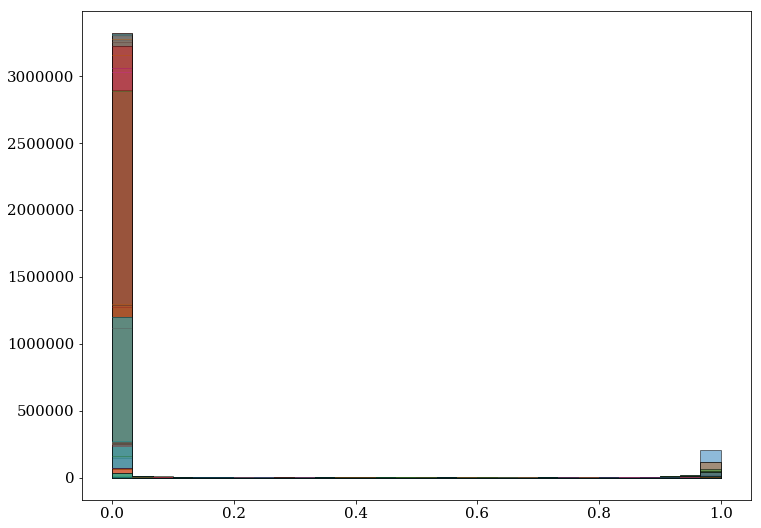

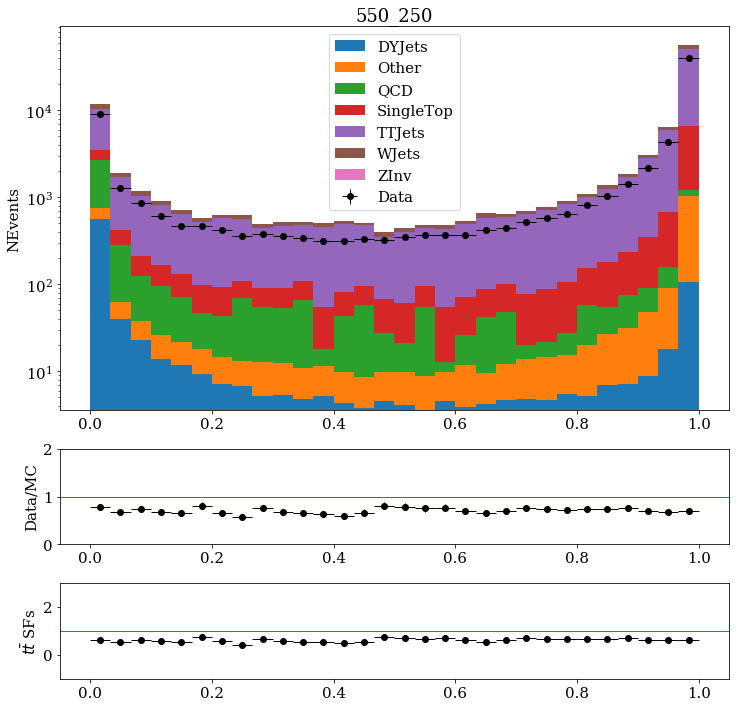

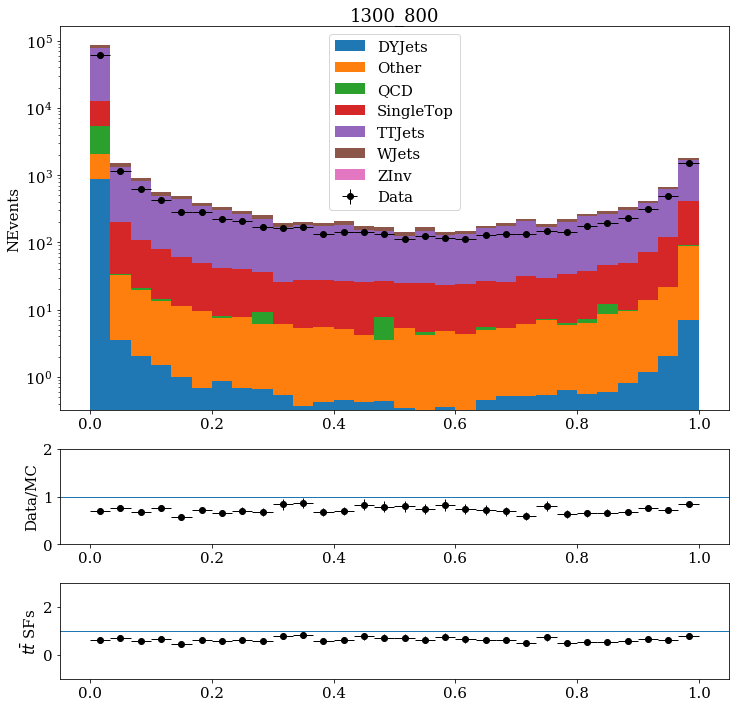

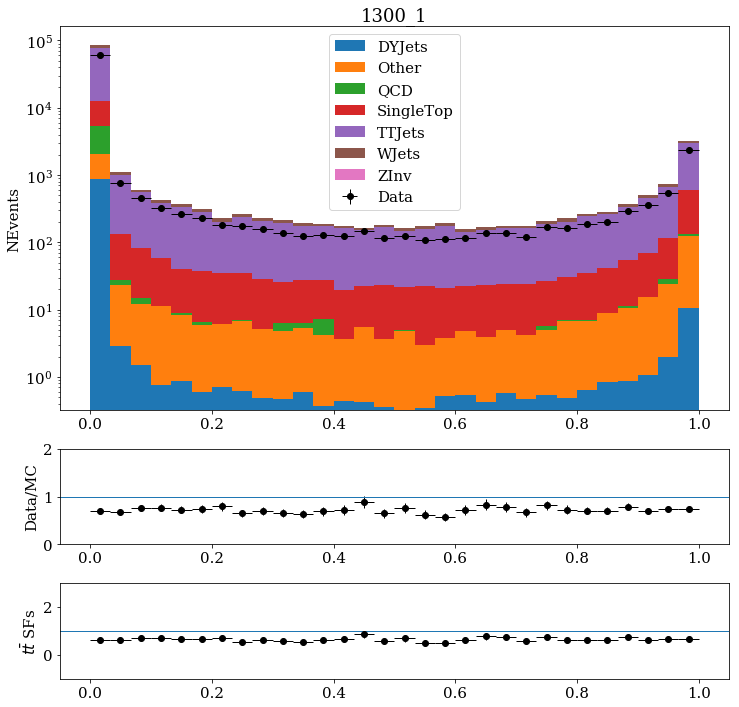

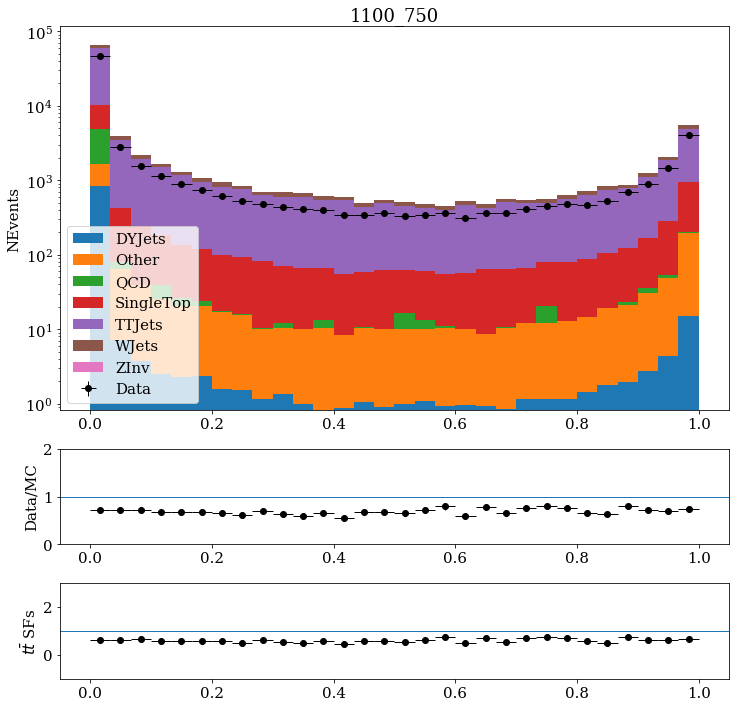

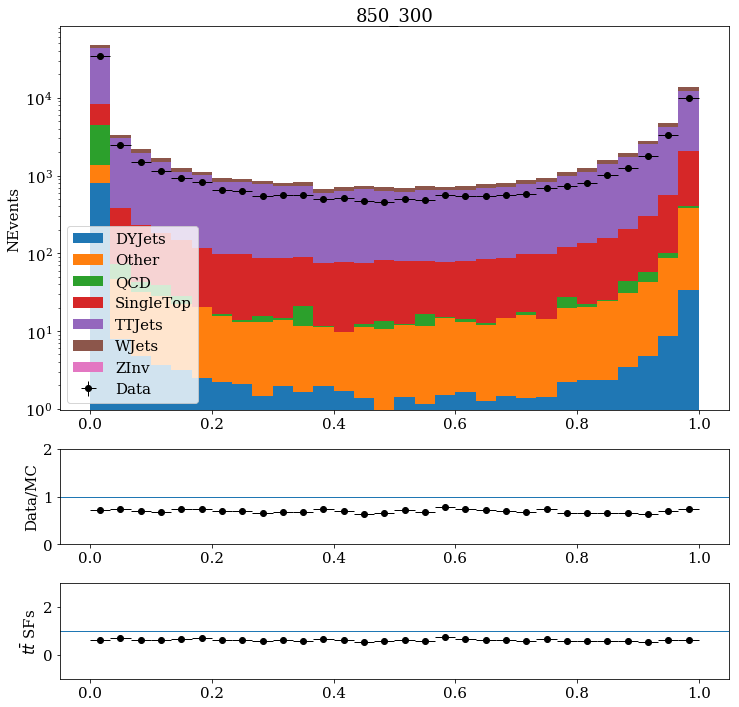

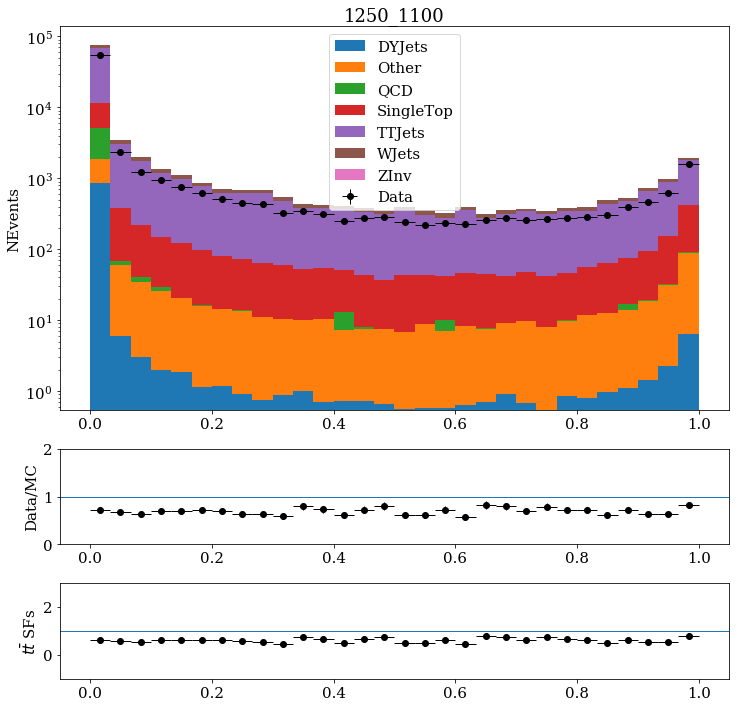

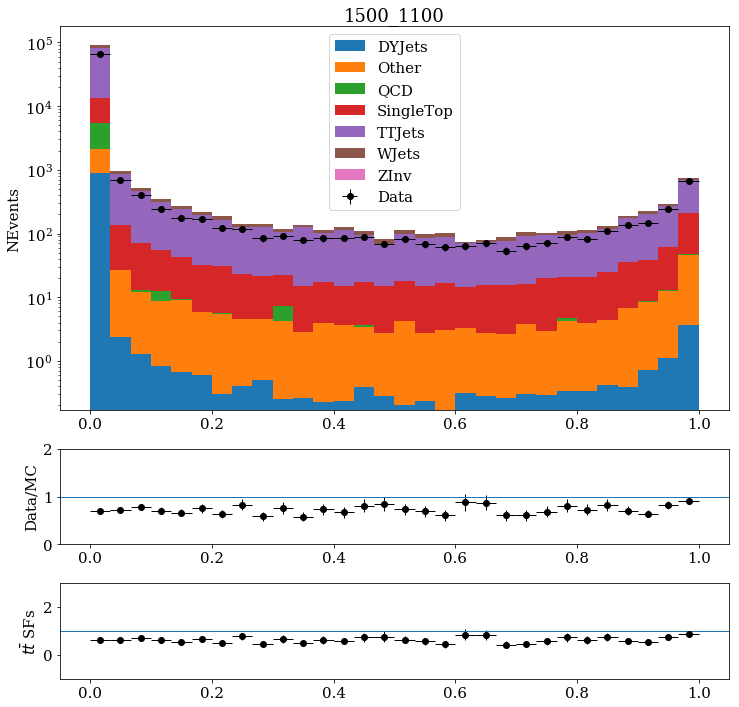

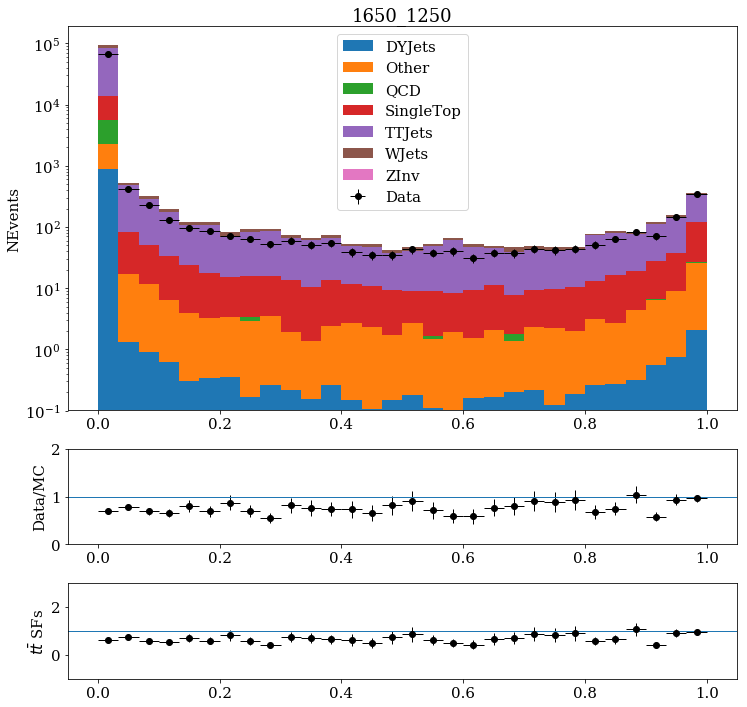

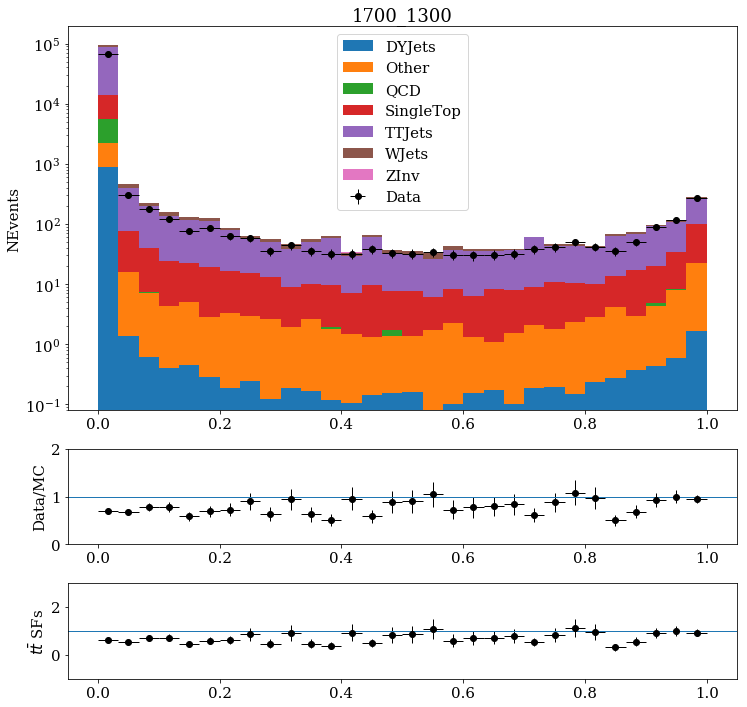

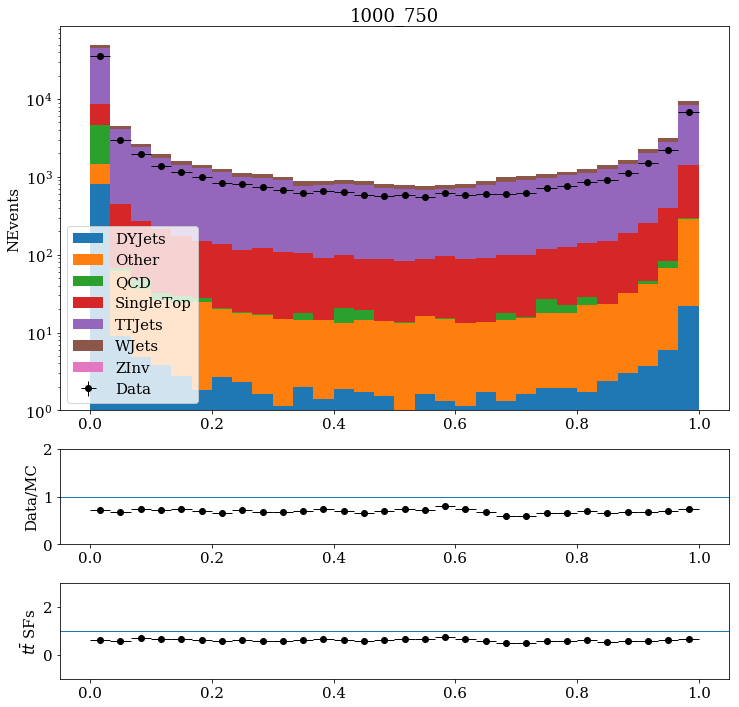

In [17]:
for sms in CR1B.data['Score']:
    matplotlib.rcParams['figure.figsize'] = 12, 9
    backgrounds = ['DYJets','Other','QCD','SingleTop','TTJets','WJets','ZInv']
    resolution = 1./CR1B.nbins
    nbins = np.linspace(0.+resolution/2,1.-resolution/2,CR1B.nbins)
    plt.figure(figsize=(12,12))
    gs = GridSpec(3,1, height_ratios=[4,1,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    
    sum_bkg = np.zeros(shape=CR1B.backgrounds['DYJets']['Bins'][sms].shape)
    err_bkg_squared = np.zeros(shape=CR1B.backgrounds['DYJets']['Bins'][sms].shape)
    for i,bkg in enumerate(backgrounds):
        ax1.bar(nbins,CR1B.backgrounds[bkg]['Bins'][sms],
                bottom = sum_bkg, 
                width=1./(CR1B.nbins),label=bkg)
        sum_bkg += CR1B.backgrounds[bkg]['Bins'][sms]
        err_bkg_squared += np.square(CR1B.backgrounds[bkg]['BinError'][sms])

    ax1.errorbar(nbins,CR1B.data['Bins'][sms], 
            yerr= CR1B.data['BinError'][sms],
            xerr=0.5/CR1B.nbins,
            label='Data', fmt='ko')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_ylabel('NEvents')
    ax1.set_title(sms)
    
    ratio = CR1B.data['Bins'][sms]/sum_bkg
    ratio_err = np.absolute(ratio)*np.sqrt(err_bkg_squared/np.square(sum_bkg) 
                                           + np.square(CR1B.data['BinError'][sms]/CR1B.data['Bins'][sms]))

    ax2.errorbar(nbins, ratio, 
                yerr=ratio_err,
                xerr=0.5/CR1B.nbins,
                fmt='ko')
    ax2.set_ylabel('Data/MC')
    ax2.set_ylim(0,2)
    ax2.axhline(y=1)
    
    ax3.errorbar(nbins, CR1B.correction['ttjets'][sms],
                yerr = CR1B.correctionError['ttjets'][sms],
                xerr = 0.5/CR1B.nbins,
                fmt = 'ko')
    ax3.set_ylabel(r'$t\bar{t}$ SFs')
    ax3.set_ylim(-1,3)
    ax3.axhline(y=1)
    plt.show()

<a id='1L0B'></a>
# Derive SFs for $W$+jets from SingleLepton 0B CR

In [18]:
if 'CR1B' in globals(): del CR1B
CR0B = Analysis(region = 'SingleLepton', nbMin=0)


Initializing 0-b analysis
Initial init time = 1.90734863281e-06
getAnalysis time = 28.5416090488
Correcting wjets
Saved wjets_correction.h5
getCorrectionFactor time = 0.0167088508606
Removed stuff


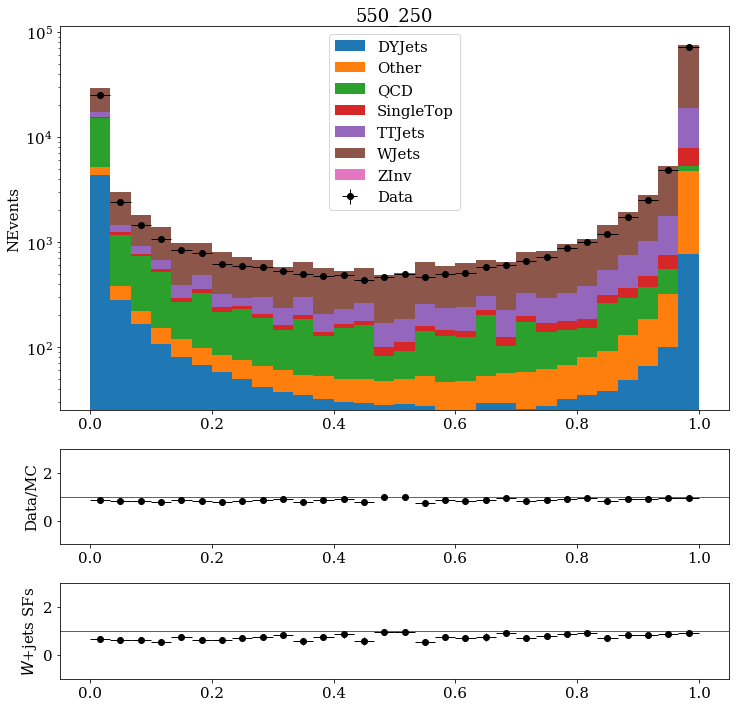

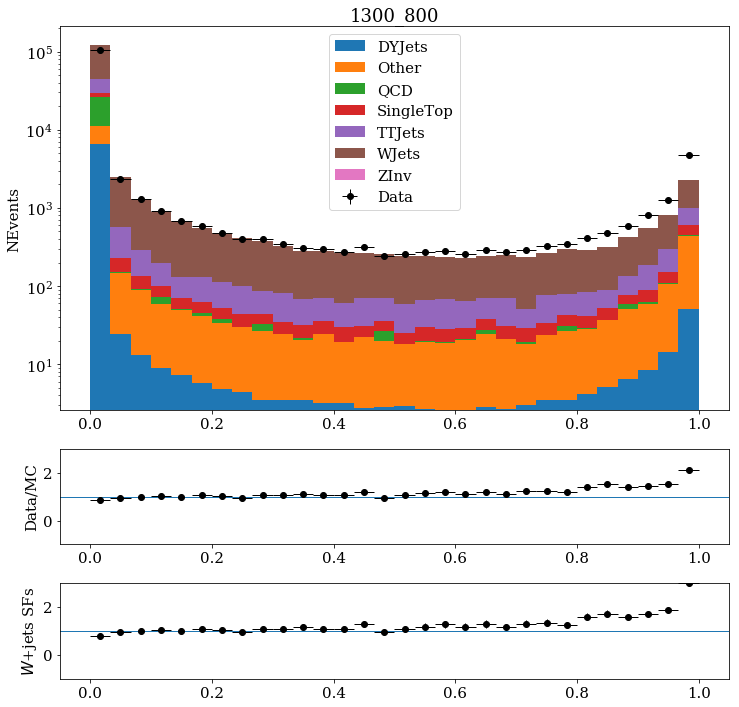

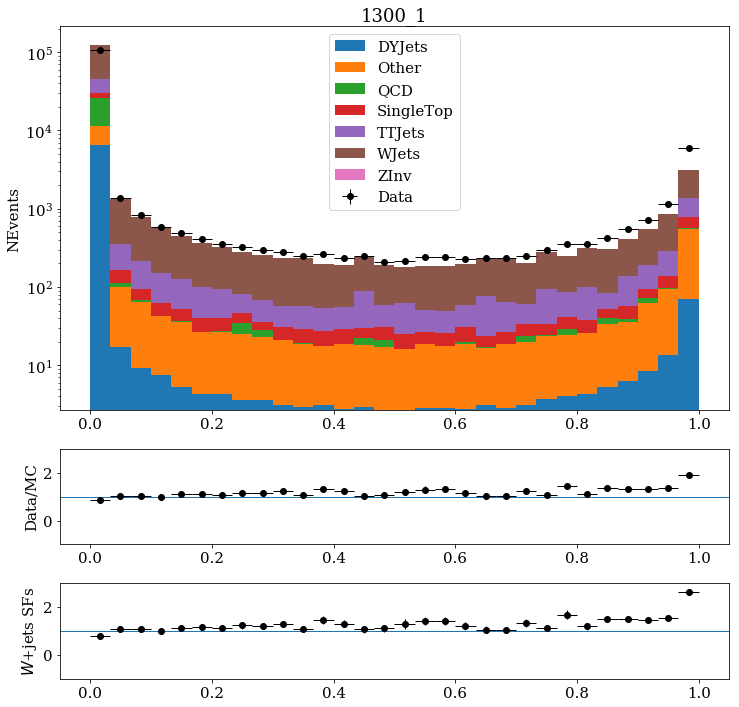

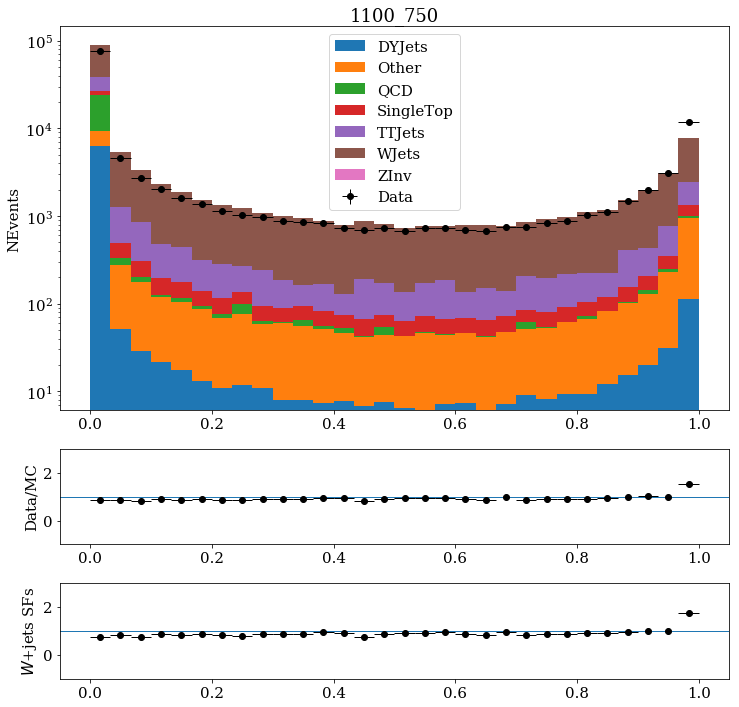

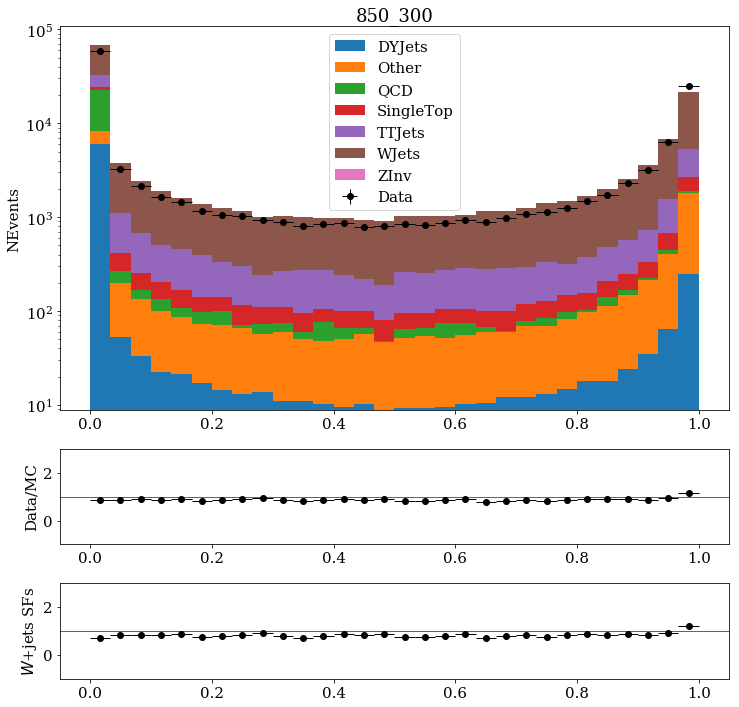

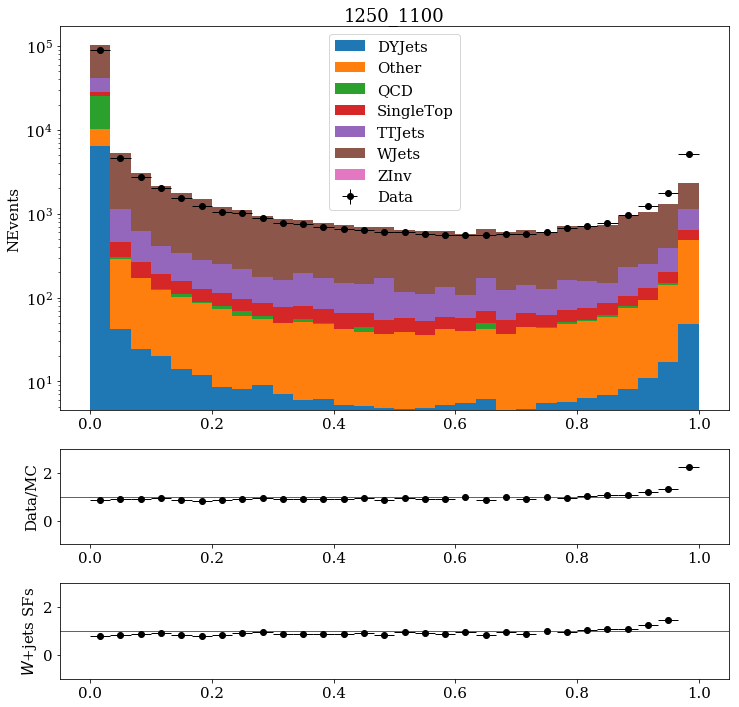

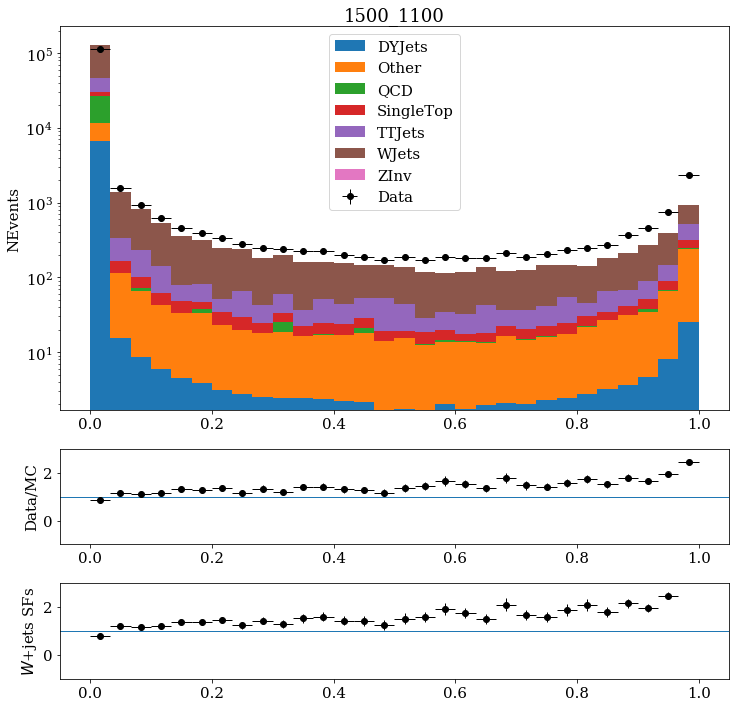

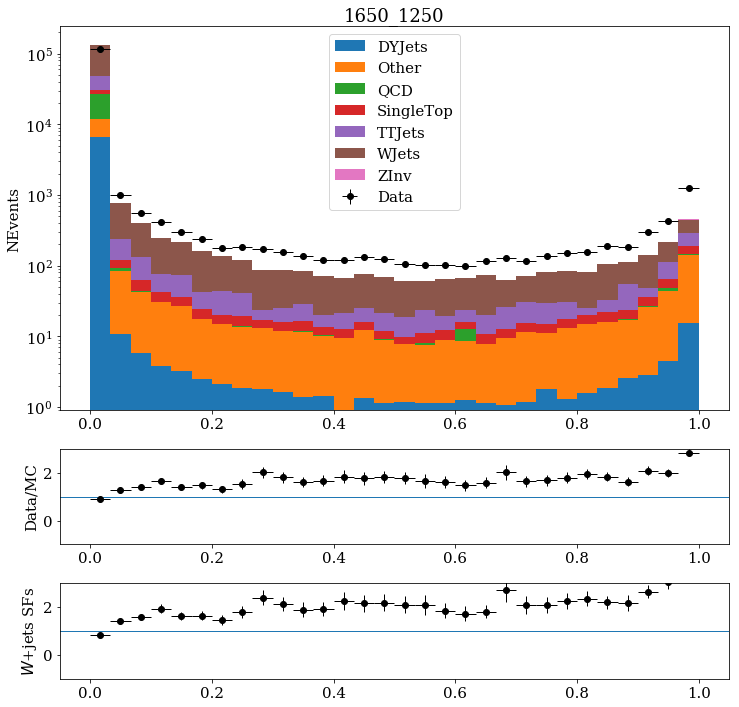

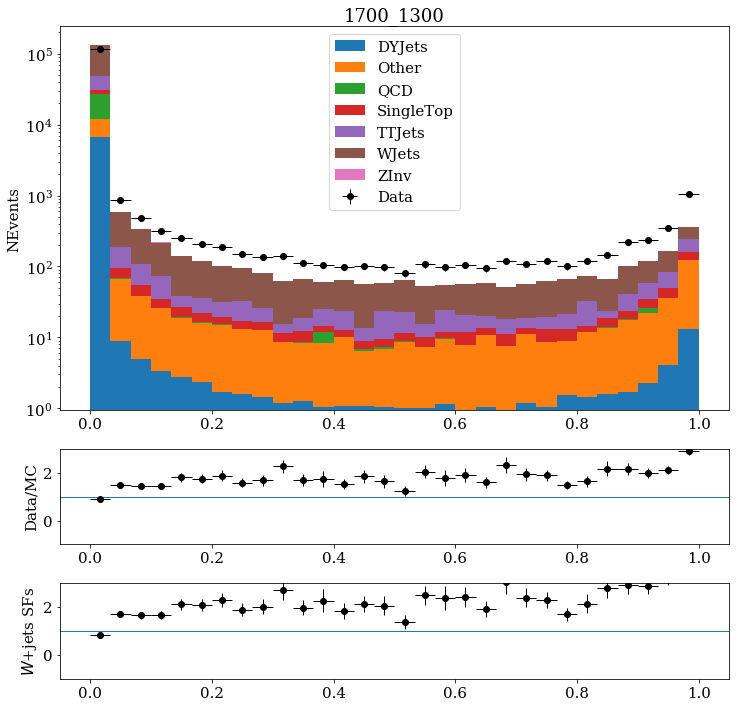

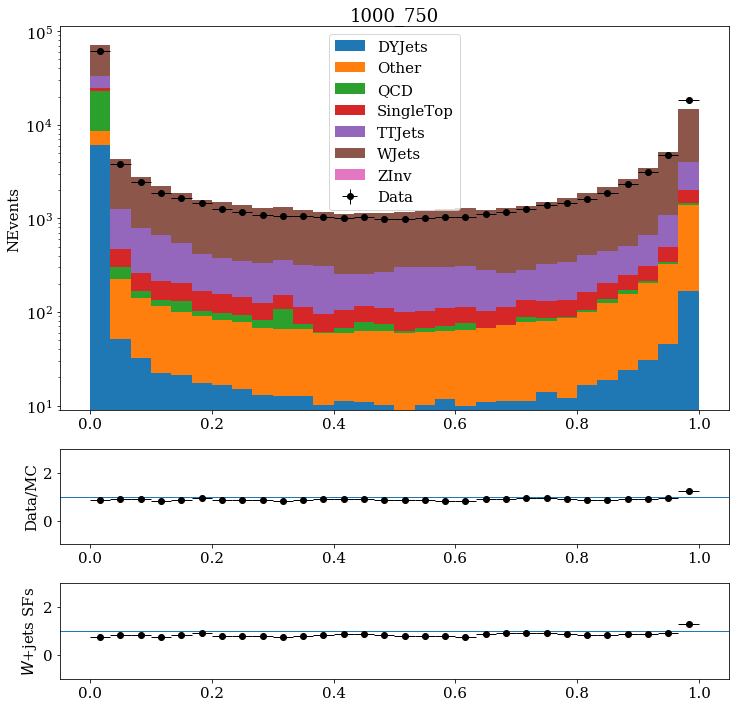

In [20]:
for sms in CR0B.data['Score']:
    matplotlib.rcParams['figure.figsize'] = 12, 9
    backgrounds = ['DYJets','Other','QCD','SingleTop','TTJets','WJets','ZInv']
    resolution = 1./CR0B.nbins
    nbins = np.linspace(0.+resolution/2,1.-resolution/2,CR0B.nbins)
    plt.figure(figsize=(12,12))
    gs = GridSpec(3,1, height_ratios=[4,1,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])
    
    sum_bkg = np.zeros(shape=CR0B.backgrounds['DYJets']['Bins'][sms].shape)
    err_bkg_squared = np.zeros(shape=CR0B.backgrounds['DYJets']['Bins'][sms].shape)
    for i,bkg in enumerate(backgrounds):
        ax1.bar(nbins,CR0B.backgrounds[bkg]['Bins'][sms],
                bottom = sum_bkg, 
                width=1./(CR0B.nbins),label=bkg)
        sum_bkg += CR0B.backgrounds[bkg]['Bins'][sms]
        err_bkg_squared += np.square(CR0B.backgrounds[bkg]['BinError'][sms])

        
    ax1.errorbar(nbins,CR0B.data['Bins'][sms], 
            yerr= CR0B.data['BinError'][sms],
            xerr=0.5/CR0B.nbins,
            label='Data', fmt='ko')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_ylabel('NEvents')
    ax1.set_title(sms)
    
    ratio = CR0B.data['Bins'][sms]/sum_bkg
    ratio_err = np.absolute(ratio)*np.sqrt(err_bkg_squared/np.square(sum_bkg) 
                                           + np.square(CR0B.data['BinError'][sms]/CR0B.data['Bins'][sms]))


    ax2.errorbar(nbins, ratio, 
                yerr=ratio_err,
                xerr=0.5/CR0B.nbins,
                fmt='ko')
    ax2.set_ylabel('Data/MC')
    ax2.set_ylim(-1,3)
    ax2.axhline(y=1)

    ax3.errorbar(nbins, CR0B.correction['wjets'][sms],
                yerr = CR0B.correctionError['wjets'][sms],
                xerr = 0.5/CR0B.nbins,
                fmt = 'ko')
    ax3.set_ylabel(r'$W$+jets SFs')
    ax3.set_ylim(-1,3)
    ax3.axhline(y=1)
    plt.show()


In [76]:
print(CR0B.backgrounds['DYJets']['Bins'][sms])

[2.69990594e+05 7.31718750e+02 4.14875000e+02 2.82250000e+02
 2.19406250e+02 1.72625000e+02 1.48718750e+02 1.30718750e+02
 1.14937500e+02 1.05375000e+02 9.70625000e+01 9.35312500e+01
 8.88437500e+01 8.06875000e+01 8.33750000e+01 7.90625000e+01
 8.06250000e+01 7.98750000e+01 7.81875000e+01 8.13125000e+01
 8.44375000e+01 8.32187500e+01 9.54687500e+01 1.01500000e+02
 1.12218750e+02 1.33781250e+02 1.58843750e+02 2.08718750e+02
 3.53843750e+02 3.31168750e+03]


# Derive SFs for $Z \rightarrow \nu \nu$ 
<a id='1LInv'></a>

## Using $W \rightarrow \ell \nu$ events with 1 lepton added to MET

In [7]:
if 'CR1B' in globals(): del CR1B
if 'CR0B' in globals(): del CR0B
CR1LInv = Analysis(region = 'OneLeptonAddToMET')

Initializing OneLeptonAddToMET analysis
Initial init time = 2.14576721191e-06
getAnalysis time = 0.0546271800995
plotScore time = 8.05145907402
Correcting wjets
Saved OneLeptonAddToMET_wjets_correction.h5
getCorrectionFactor time = 0.0109150409698
Removed stuff


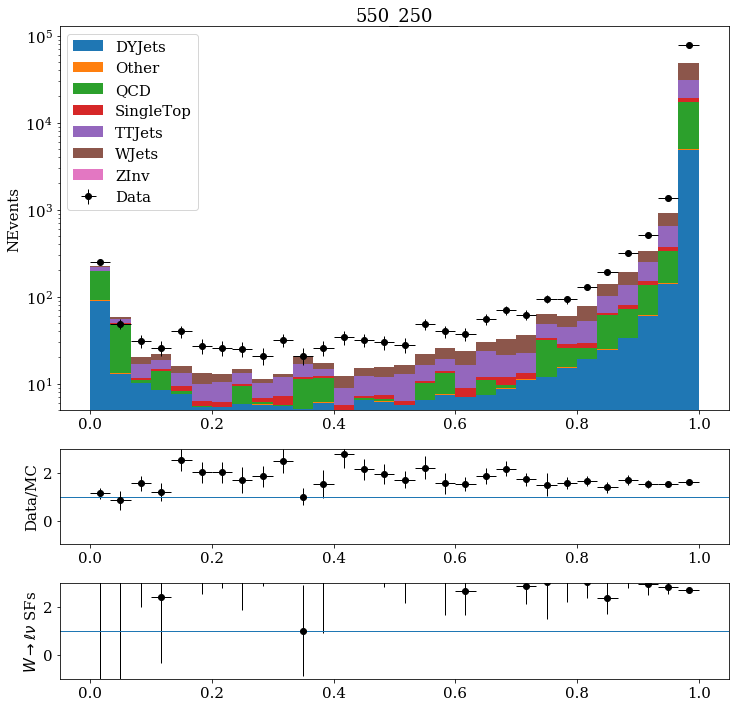

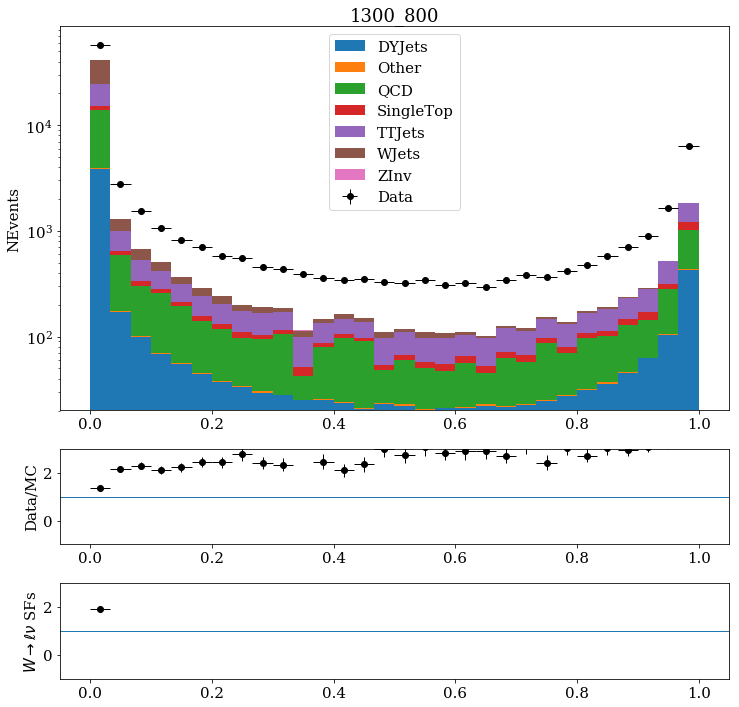

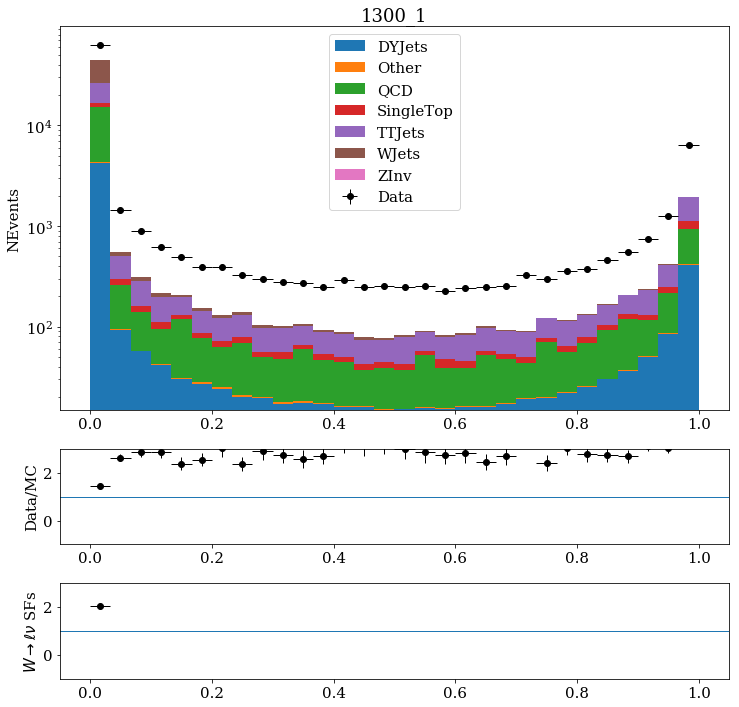

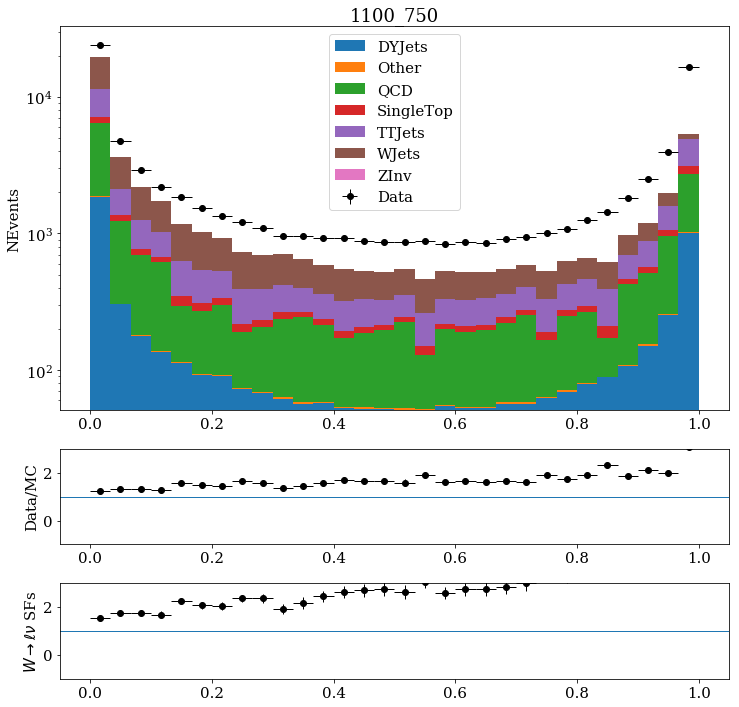

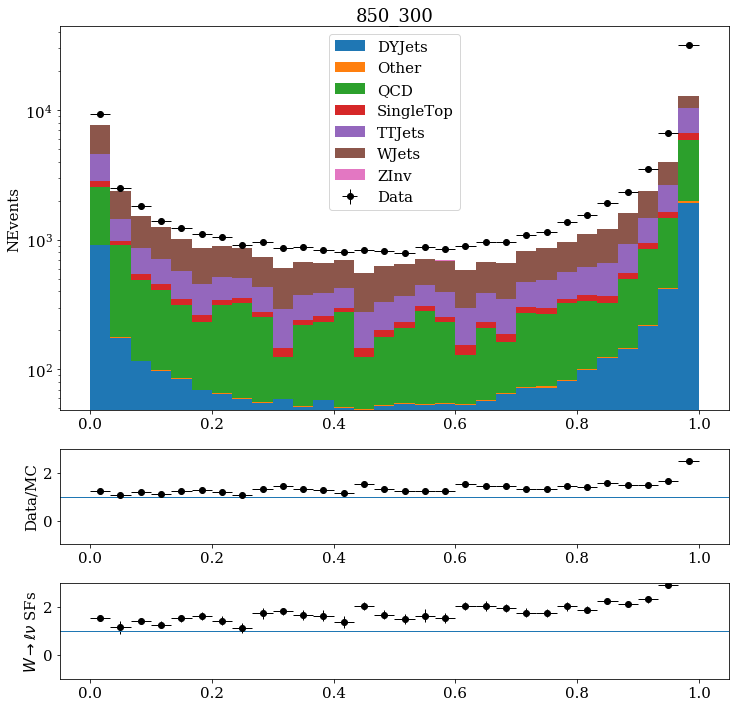

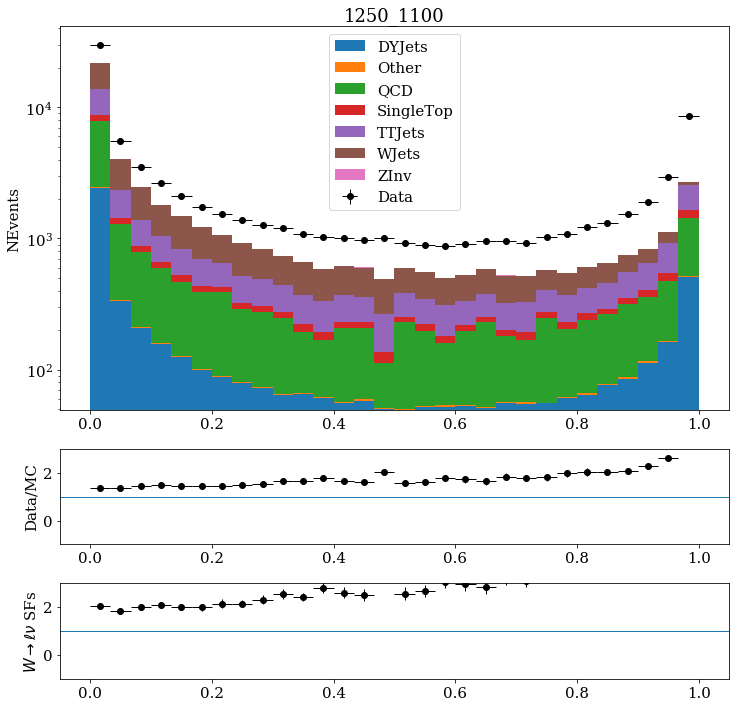

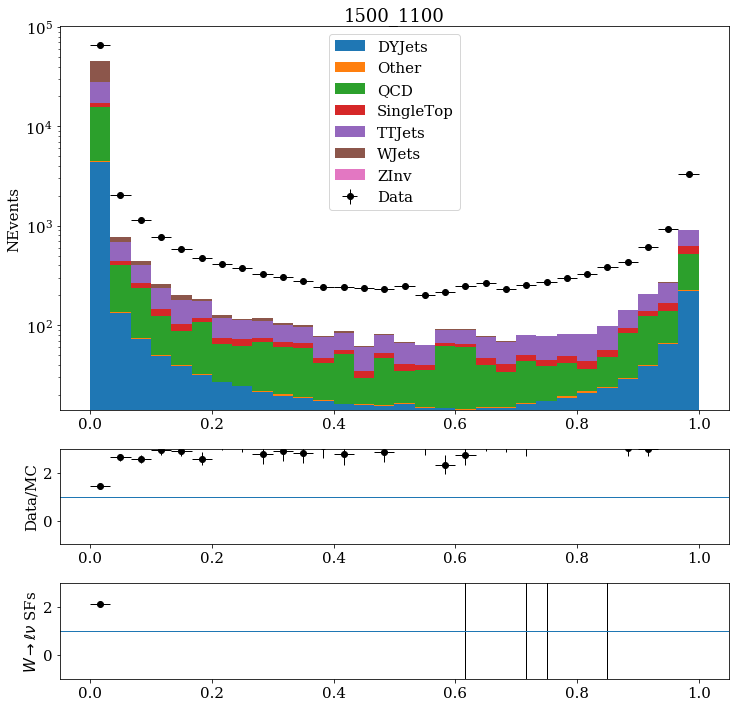

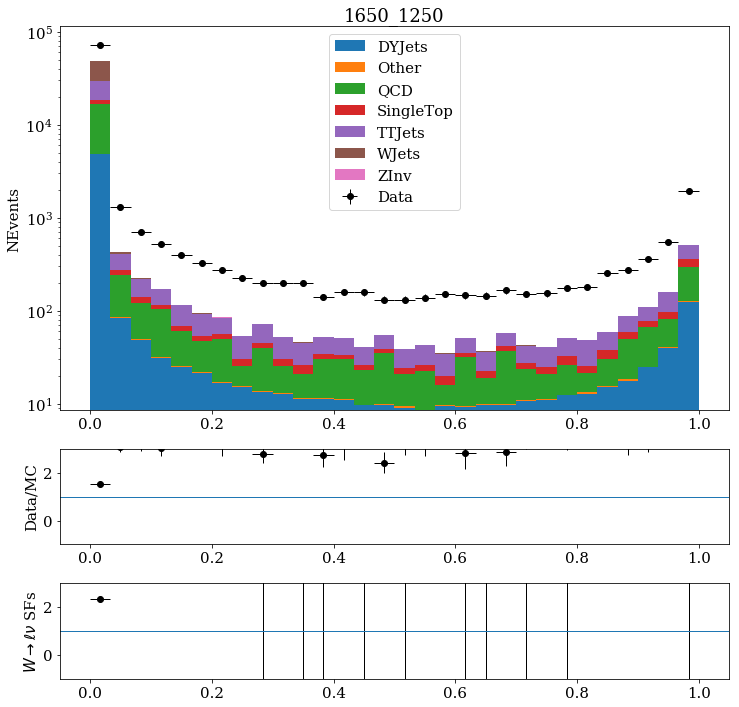

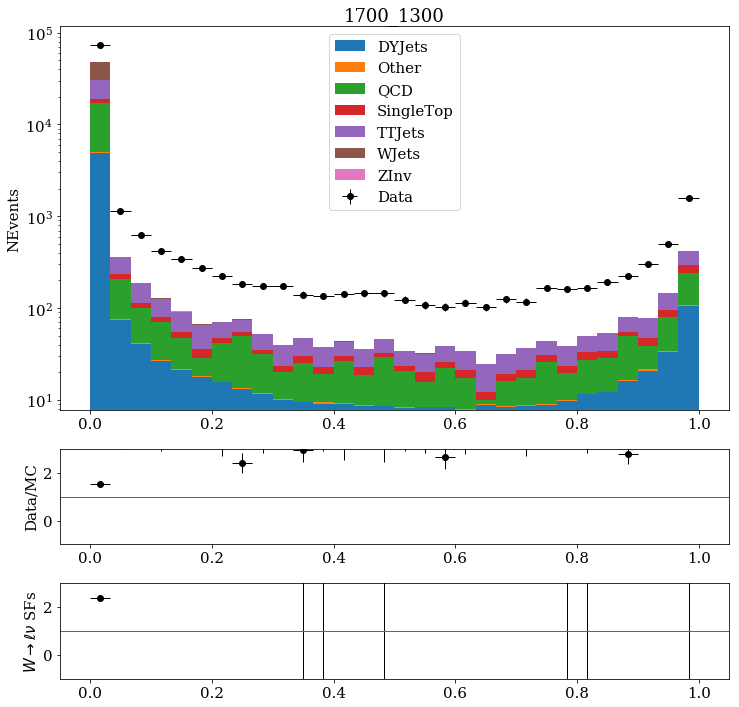

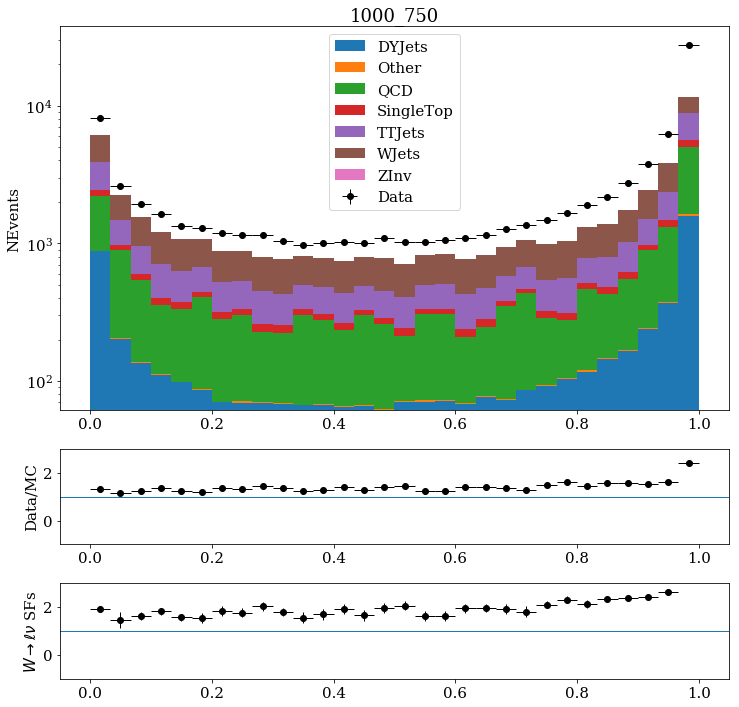

In [10]:
for sms in CR1LInv.data['Score']:
    matplotlib.rcParams['figure.figsize'] = 12, 9
    backgrounds = ['DYJets','Other','QCD','SingleTop','TTJets','WJets','ZInv']
    resolution = 1./CR1LInv.nbins
    nbins = np.linspace(0.+resolution/2,1.-resolution/2,CR1LInv.nbins)
    plt.figure(figsize=(12,12))
    gs = GridSpec(3,1, height_ratios=[4,1,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])

    sum_bkg = np.zeros(shape=CR1LInv.backgrounds['DYJets']['Bins'][sms].shape)
    err_bkg_squared = np.zeros(shape=CR1LInv.backgrounds['DYJets']['Bins'][sms].shape)
    for i,bkg in enumerate(backgrounds):
        ax1.bar(nbins,CR1LInv.backgrounds[bkg]['Bins'][sms],
                bottom = sum_bkg,
                width=1./(CR1LInv.nbins),label=bkg)
        sum_bkg += CR1LInv.backgrounds[bkg]['Bins'][sms]
        err_bkg_squared += np.square(CR1LInv.backgrounds[bkg]['BinError'][sms])


    ax1.errorbar(nbins,CR1LInv.data['Bins'][sms],
            yerr= CR1LInv.data['BinError'][sms],
            xerr=0.5/CR1LInv.nbins,
            label='Data', fmt='ko')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_ylabel('NEvents')
    ax1.set_title(sms)

    ratio = CR1LInv.data['Bins'][sms]/sum_bkg
    ratio_err = np.absolute(ratio)*np.sqrt(err_bkg_squared/np.square(sum_bkg)
                                           + np.square(CR1LInv.data['BinError'][sms]/CR1LInv.data['Bins'][sms]))


    ax2.errorbar(nbins, ratio,
                yerr=ratio_err,
                xerr=0.5/CR1LInv.nbins,
                fmt='ko')
    ax2.set_ylabel('Data/MC')
    ax2.set_ylim(-1,3)
    ax2.axhline(y=1)

    ax3.errorbar(nbins, CR1LInv.correction['wjets'][sms],
                yerr = CR1LInv.correctionError['wjets'][sms],
                xerr = 0.5/CR1LInv.nbins,
                fmt = 'ko')
    ax3.set_ylabel(r'$W\rightarrow \ell \nu$ SFs')
    ax3.set_ylim(-1,3)
    ax3.axhline(y=1)
    plt.show()
    
    

<a id ='2LInv'></a>

## Using $Z\rightarrow \ell \ell$ events with 2 leptons added to MET

In [17]:
if 'CR1B' in globals(): del CR1B
if 'CR0B' in globals(): del CR0B
if 'CR1LInv' in globals(): del CR1LInv
CR2LInv = Analysis(region = 'DileptonAddToMET')

Initializing DileptonAddToMET analysis
Initial init time = 1.90734863281e-06
getAnalysis time = 0.0320308208466
plotScore time = 2.85045218468
Correcting dyjets
Saved DileptonAddToMET_dyjets_correction.h5
getCorrectionFactor time = 0.0631217956543
Removed stuff


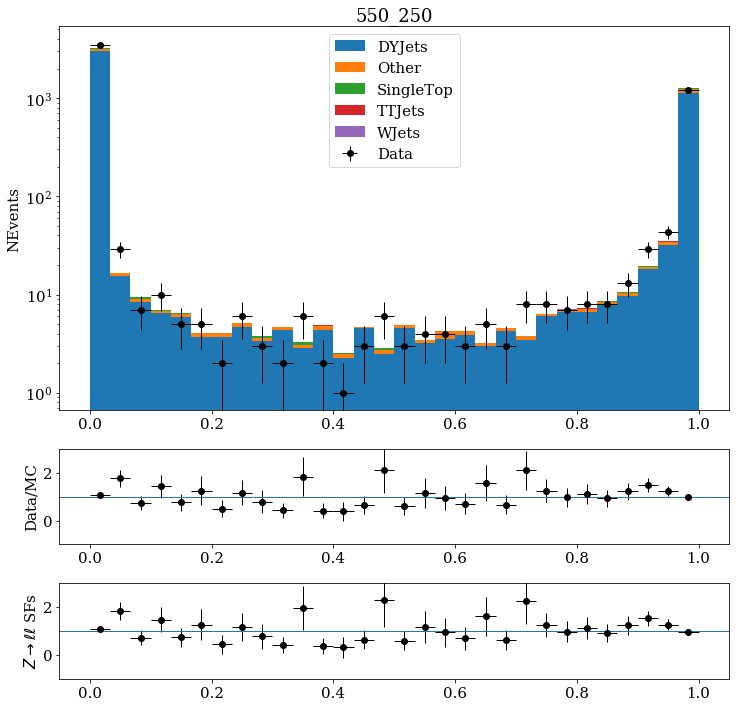

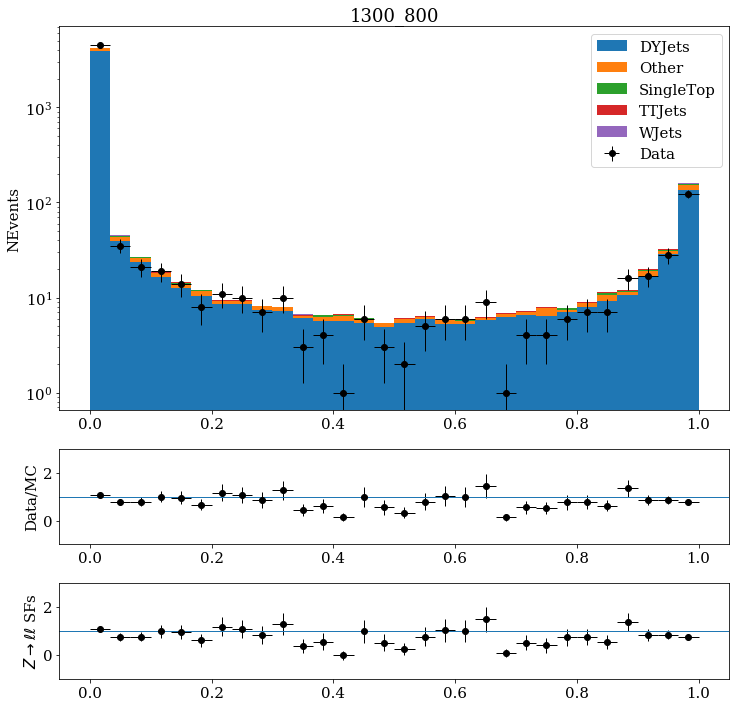

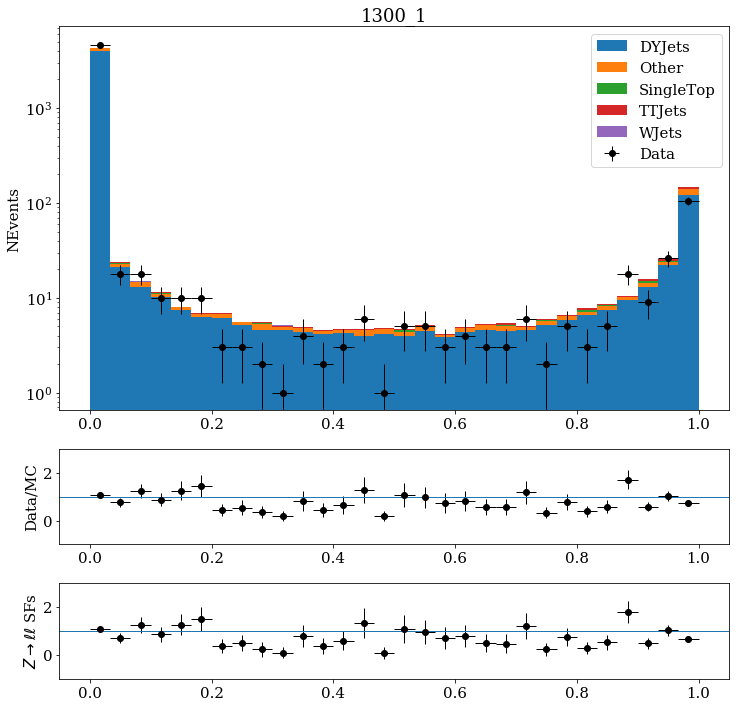

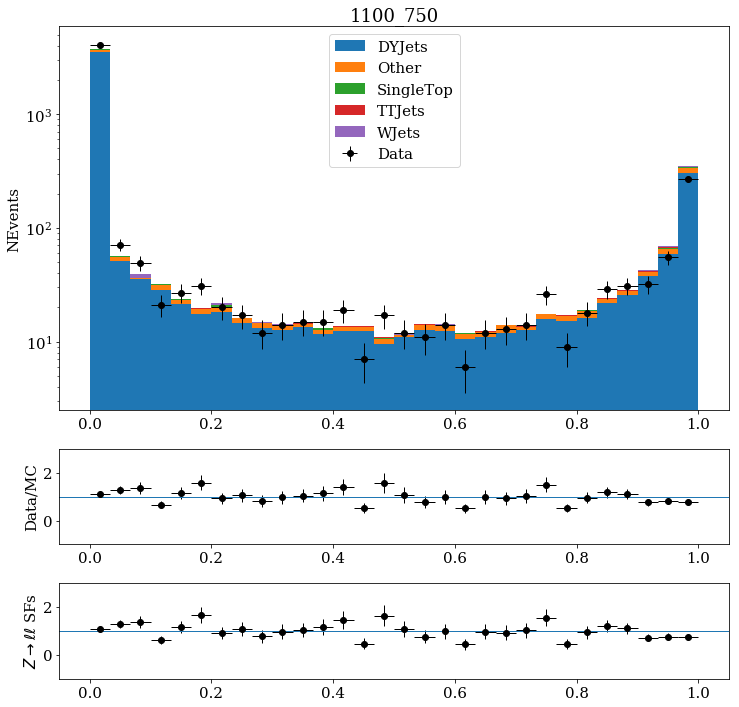

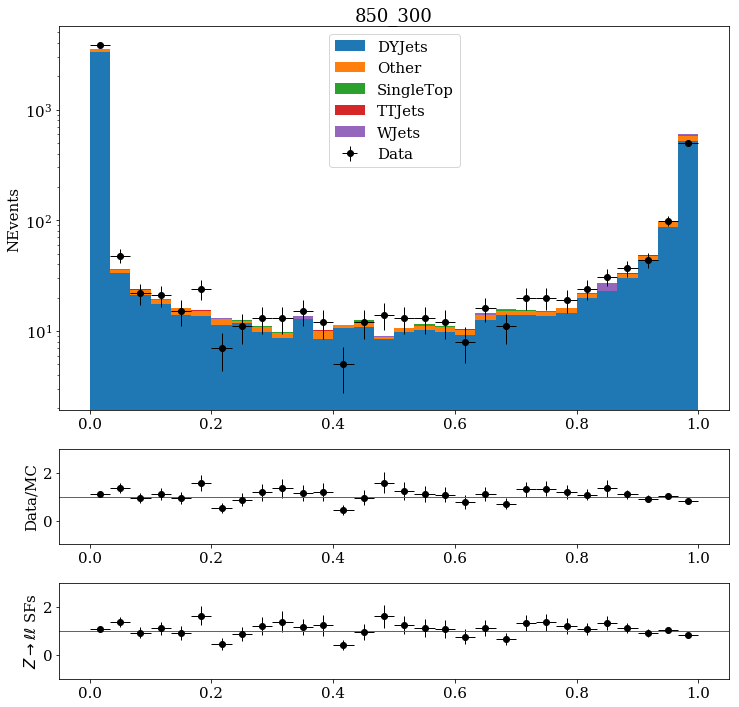

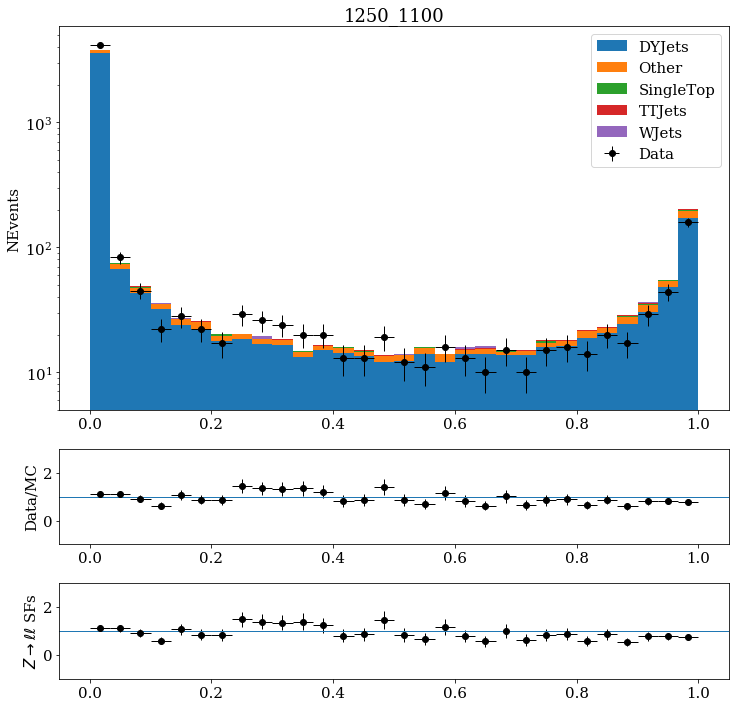

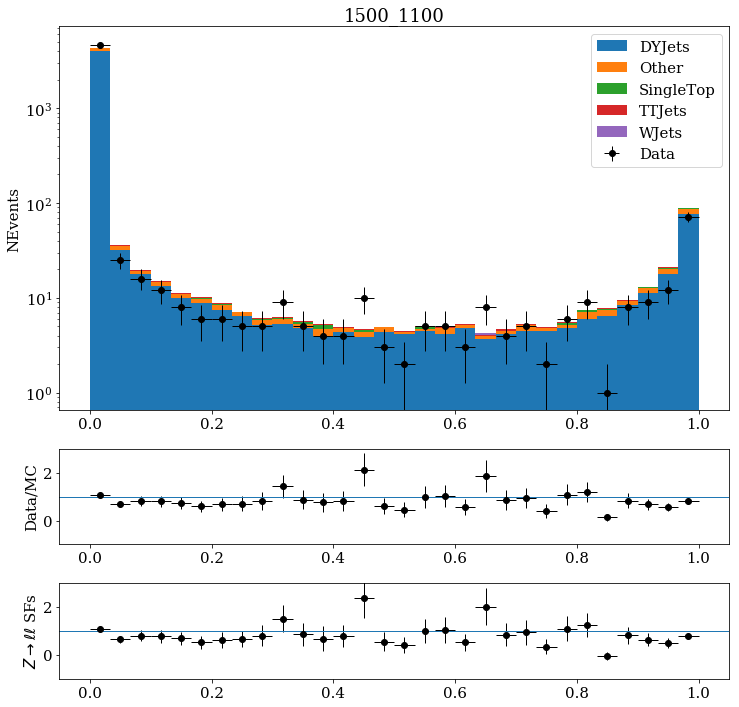

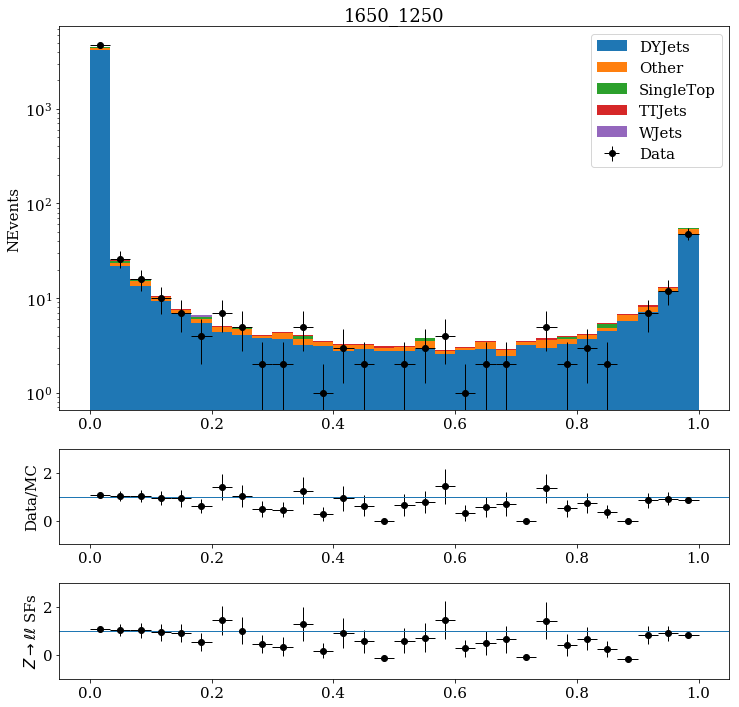

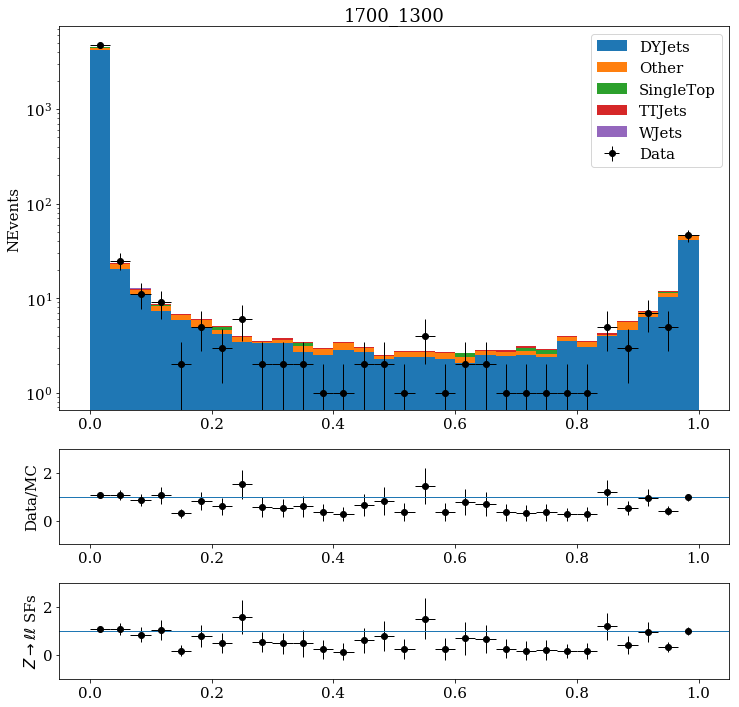

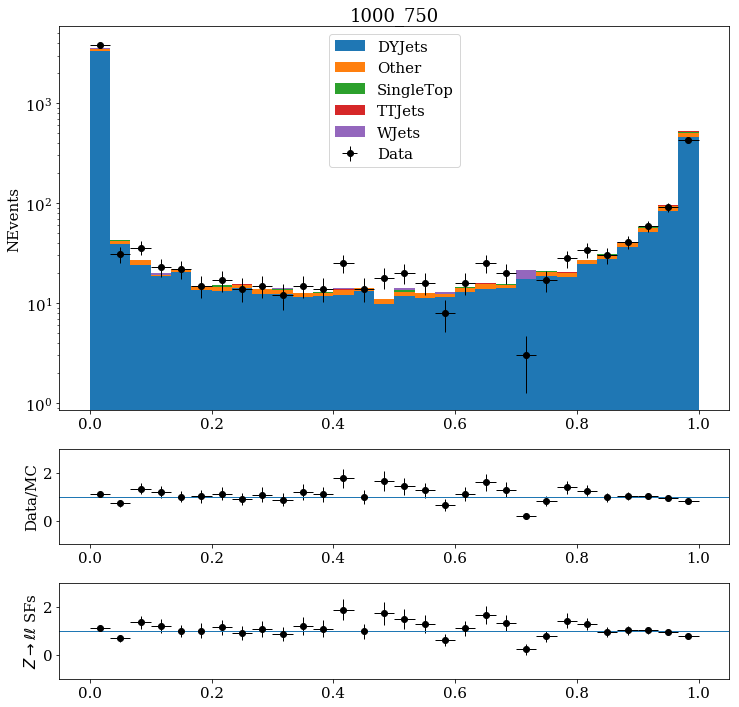

In [20]:
for sms in CR2LInv.data['Score']:
    matplotlib.rcParams['figure.figsize'] = 12, 9
    backgrounds = ['DYJets','Other','SingleTop','TTJets','WJets']
    resolution = 1./CR2LInv.nbins
    nbins = np.linspace(0.+resolution/2,1.-resolution/2,CR2LInv.nbins)
    plt.figure(figsize=(12,12))
    gs = GridSpec(3,1, height_ratios=[4,1,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax3 = plt.subplot(gs[2])

    sum_bkg = np.zeros(shape=CR2LInv.backgrounds['DYJets']['Bins'][sms].shape)
    err_bkg_squared = np.zeros(shape=CR2LInv.backgrounds['DYJets']['Bins'][sms].shape)
    for i,bkg in enumerate(backgrounds):
        ax1.bar(nbins,CR2LInv.backgrounds[bkg]['Bins'][sms],
                bottom = sum_bkg,
                width=1./(CR2LInv.nbins),label=bkg)
        sum_bkg += CR2LInv.backgrounds[bkg]['Bins'][sms]
        err_bkg_squared += np.square(CR2LInv.backgrounds[bkg]['BinError'][sms])


    ax1.errorbar(nbins,CR2LInv.data['Bins'][sms],
            yerr= CR2LInv.data['BinError'][sms],
            xerr=0.5/CR2LInv.nbins,
            label='Data', fmt='ko')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_ylabel('NEvents')
    ax1.set_title(sms)

    ratio = CR2LInv.data['Bins'][sms]/sum_bkg
    ratio_err = np.absolute(ratio)*np.sqrt(err_bkg_squared/np.square(sum_bkg)
                                           + np.square(CR2LInv.data['BinError'][sms]/CR2LInv.data['Bins'][sms]))


    ax2.errorbar(nbins, ratio,
                yerr=ratio_err,
                xerr=0.5/CR2LInv.nbins,
                fmt='ko')
    ax2.set_ylabel('Data/MC')
    ax2.set_ylim(-1,3)
    ax2.axhline(y=1)

    ax3.errorbar(nbins, CR2LInv.correction['dyjets'][sms],
                yerr = CR2LInv.correctionError['dyjets'][sms],
                xerr = 0.5/CR2LInv.nbins,
                fmt = 'ko')
    ax3.set_ylabel(r'$Z\rightarrow \ell \ell$ SFs')
    ax3.set_ylim(-1,3)
    ax3.axhline(y=1)
    plt.show()